Training set: 74 class0 images, 74 class1 images
Validation set: 20 class0 images, 20 class1 images
Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.4550 - loss: 11.1007 - val_accuracy: 0.5625 - val_loss: 4.1706
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.4375 - loss: 19.4412 - val_accuracy: 0.2500 - val_loss: 1.4470
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5449 - loss: 2.9393
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 342ms/step - accuracy: 0.6250 - loss: 1.7624 - val_accuracy: 0.5000 - val_loss: 0.6873
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.4771 - loss: 1.3434 - val_accuracy: 0.3750 - val_loss: 0.6943
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5500 - loss: 0.6679  
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6100 - loss: 0.6798 - val_accuracy: 0.5312 - val_loss: 0.6929
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.4688 - loss: 0.6893 - val_accuracy: 0.3750 - val_loss: 0.6944
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4376 - loss: 0.6968
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 380ms/step - accuracy: 0.5938 - loss: 0.6777 - val_accuracy: 0.4688 - val_loss: 0.6935
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.5104 - loss: 0.6931
Validation accuracy: 0.5


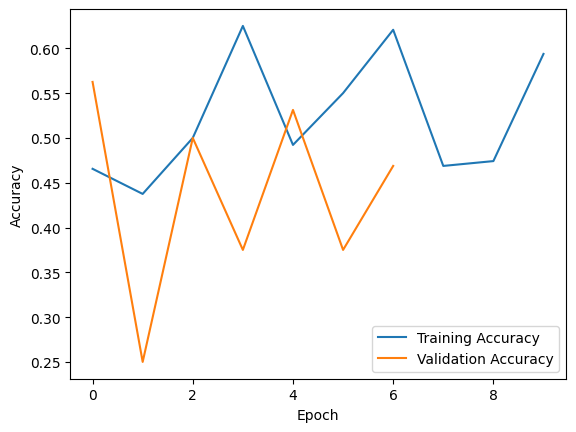

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os

# Set data paths
train_dir = '/kaggle/input/covid19/xray_dataset_covid19/train'
validation_dir = '/kaggle/input/covid19/xray_dataset_covid19/test'

# Verify dataset structure
train_class0 = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
train_class1 = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
print(f"Training set: {train_class0} class0 images, {train_class1} class1 images")

val_class0 = len(os.listdir(os.path.join(validation_dir, 'NORMAL')))
val_class1 = len(os.listdir(os.path.join(validation_dir, 'PNEUMONIA')))
print(f"Validation set: {val_class0} class0 images, {val_class1} class1 images")

# Image parameters
img_size = (224, 224)
batch_size = 32

# Data generators with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary')

# Build a simpler model with dropout
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Validation accuracy: {test_acc}')

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()